Підібрати структуру і парамери мережі в "пісочниці" TensorFlow для класифікації елементів на двох рукавах спіралі
Розібратись із прикладами нейромереж для класифікації датасету MNIST

In [99]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix

In [100]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [101]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


In [102]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

<Figure size 600x600 with 0 Axes>

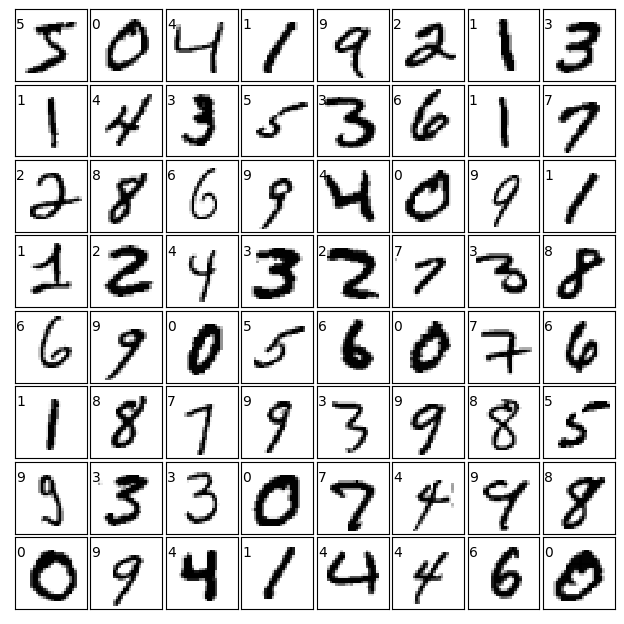

In [103]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))

In [104]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


In [105]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [106]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 5, 5, 32)         128       
 hNormalization)                                                 
                                                      

In [107]:
results = model.fit(
    X_train, y_train,
    epochs= 5,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 2
)

Epoch 1/5
1875/1875 - 20s - loss: 0.0947 - accuracy: 0.9708 - val_loss: 0.0800 - val_accuracy: 0.9758 - 20s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 19s - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0388 - val_accuracy: 0.9875 - 19s/epoch - 10ms/step
Epoch 3/5
1875/1875 - 19s - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0419 - val_accuracy: 0.9867 - 19s/epoch - 10ms/step
Epoch 4/5
1875/1875 - 18s - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0398 - val_accuracy: 0.9904 - 18s/epoch - 10ms/step
Epoch 5/5
1875/1875 - 18s - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.0429 - val_accuracy: 0.9889 - 18s/epoch - 10ms/step


In [108]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0122, accuracy: 99.6083%
Evaluating on testing set...
loss=0.0429, accuracy: 98.8900%


Maximum Loss : 0.0947
Minimum Loss : 0.0148
Loss difference : 0.0799


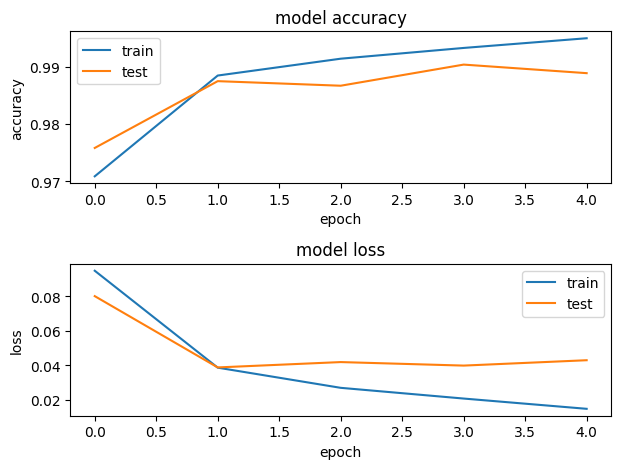

In [109]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

была просмотрена модель, поигрался с гиперпарраметрами, изменил learning_rate в результате чего результаты получились лучше, чем в примере с сайта. в данном случае для нормального результата достаточно было одной эпохи, с каждой эпохой обучается  как правило лучше(но не на много), ну на 3й 4й эпохе результаты теста иногда хуже.